# Fitting a model to data

This is NOT a maths course. Our aim is to provide practical advice, so that an appropriate model can be chosen to fit a dataset.   
Start by asking yourself some questions.  
**Are all my data OK, and what range am I interested in?**  
**What type of model might I expect?**  
**What shape of curve looks like it fits acceptably?**  
Note: statistical measures of fit should usually be considered, but a quick visual test is a good starting point.

In [2]:
''' Import modules and load data'''

import numpy as np
import matplotlib.pyplot as plt

# load global GDP per capita (wealth) data
filename = '../data/economy/gdp-per-capita-world-usd2010.csv'
gdpYear = np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=(0,))
gdpPerCapita = np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=(1,))


## Polynomial models
### Constant value

\begin{equation}  y = C_0  \end{equation}  

The simplest model to fit to your data is simply that there is some underlying constant value. 

Measurement error or real fluctuations may result in variability in your data. The obvious and most commonly used approach is to simply find the mean value of a numpy array of observations  
`C = yObservations.mean()`  

However, not all data are perfect! What if there are measurement errors (producing wildly wrong values), or other infrequent processes interrupt normal observations (e.g. a truck drove past your measurement site)? Maybe you need to remove outliers?  
One way to do this is to take the median value   
`C = yObservations.median()`   

Alternatively, take the mean and then remove all values that are extreme (e.g. >3 standard deviations from the mean). If you know some rule to find anomalous values, you can manually deselect invalid data, e.g. if you have some invalid zero values  
`C = yObservations[yObservations != 0].mean()`  
The operator `!=` means 'not equals'  

**These considerations ALWAYS apply: first filter to only use relevant/valid data.**


### Linear fit

\begin{equation}  y = C_0 + C_1 x \end{equation}  

A straight line (polynomial of order 1) is probably the starting point for any analysis of bivariate data (two variables/observables $x,y$).  

We use numpy to solve real-world problems in steps.  

**Step 1:** Fit observed data to find model parameters  
`modelParameters = np.polyfit(xObservations,yObservations,1)`  
this generates a list object [$C_1,C_0$]

**Step 2:** Define a generalized function $f$, based on the model parameters, that can compute  $y=f(x)$ at any $x$.  
`modelFunction = np.poly1d(modelParameters)`

**Step 3:** Generate model values of $y$ at specific values of $x$ that you are interested in.  
`yModelValues = modelFunction(xValues)`

### Generalized polynomial

\begin{equation}  y = C_0 + C_1 x + ... + C_nx^n\end{equation}  

The complexity of the model can be increased by increasing the order ($n$) of the polynomial. Quadratic ($n=2$), cubic ($n=3$), etc.  
The `list` of model parameters simply increases in length [$C_n,...,C_1,C_0$].

Try experimenting below with the GDP data (try $n$ up to 5). 

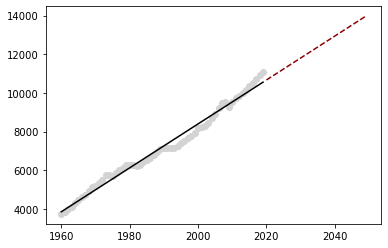

modelParameters = [ 1.13568228e+02 -2.18737830e+05]


In [25]:
# Plot data
x = gdpYear
y = gdpPerCapita
plt.scatter(x,y,color='lightgrey')

polynomialOrder = n = 1

modelParameters = np.polyfit(x,y,polynomialOrder)

modelFunction = np.poly1d(modelParameters)
yModel = modelFunction(x)

plt.plot(x, yModel, color='black')

# extrapolate to future
xFuture = np.arange(2020,2050,1)
yFuture = modelFunction(xFuture)
plt.plot(xFuture,yFuture,color='darkred',linestyle='--')

plt.show()
print('modelParameters =',modelParameters)

Note how sensitive future predictions are to increasing model complexity.  
It is risky to extrapolate outside the data range using a high-order polynomial.  
Maybe a simple linear model ($n=1$) is enough for this dataset!

## Exponential growth

Consider a population containing $N$ items, e.g. atoms, people, or sick people. Each individual item experiences creation and later destruction. The change in size of the population ($dN$) depends on a growth factor (probablility per unit time, $k$) that describes the net effect of an individual reproducing (increases population) or dying (reduces population), multiplied by the current size of the population ($N$), multiplied by the length of time elapsed ($dt$). 

\begin{equation*}
dN = k N dt 
\end{equation*}


\begin{equation*}
\frac{dN}{dt} = k N  
\end{equation*}

or equivalently in dimensionless form

\begin{equation*}
\frac{dN}{N} = \frac{dt}{T}
\end{equation*}

where $T=1/k$ is a characteristic time.

If $k$ (and $T$ ) is not a function of $N$ then the equation can be easily separated, rearranged and integrated to find a solution.

\begin{equation*}
\int \frac{dN}{N} = \int k dt
\end{equation*}

If $k$ is constant (does not change with time), then the solution is

\begin{equation*}
\ln N = A + k t
\end{equation*}

\begin{equation*}
N = B \exp(k t) = B \exp\left(\frac{t}{T}\right)
\end{equation*}

i.e. exponential growth or decay, depending on the sign of the growth factor $k$ ($A$ and $B$ are constants, with $B = e^A$).

## Fitting an exponential model: BEVs

In the simple case that k is a constant, we have a straight line.

\begin{equation} y = A + k t \end{equation}

So, if we were to plot $y = \ln(N)$ against $x = t$, we could fit a straight line with $C_0 = A$ and $C_1 = k$. 

To transform back from y to N, we use the inverse of the $\ln()$ function, which is $\exp()$, applied to both sides of the equation.  

\begin{equation} N = \exp(y) = \exp(A + k t) = B\exp(kt)\end{equation}


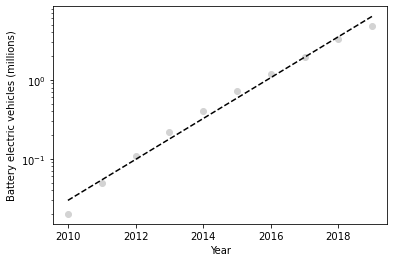

In [32]:
filename = '../data/energy-renewable/BEV_IEA2020.csv' 
tBev,bev = np.genfromtxt(filename,delimiter=',',skip_header=2,usecols=(0,1),unpack=True)

params = np.polyfit(tBev,np.log(bev),1)
modelFunc = np.poly1d(params)
trendBev = np.exp(modelFunc(tBev))

plt.yscale('log')
plt.plot(tBev,bev,marker='o',color='lightgrey',linestyle='')
plt.plot(tBev,trendBev,color='black',linestyle='--')
plt.xlabel('Year')
plt.ylabel('Battery electric vehicles (millions)')
plt.show()

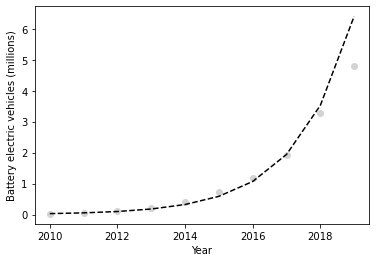

In [33]:
plt.plot(tBev,bev,marker='o',color='lightgrey',linestyle='')
plt.plot(tBev,trendBev,color='black',linestyle='--')
plt.xlabel('Year')
plt.ylabel('Battery electric vehicles (millions)')

plt.show()

## Your task

Consider the three datasets that you have already loaded: population, GDP/person, total energy use.  
Select a uniform time to analyse: lets take 1965-2018. (see example code below: we need to make arrays that are compatible)
Second, calculate the quantity (energy efficiency) = (total energy)/(total GDP)  
Total GDP is simply the population multiplied by GDP/person.  
**Examine the energy efficiency data and fit a trend line**  
Is a linear model or exponential model more appropriate?


In [35]:
# create an array sel that indexes the years we want
# the & is a bitwise and operator, i.e. is TRUE only if both values are true.
sel = (gdpYear > 1964) & (gdpYear < 2019)
print(gdpYear[sel])
print(gdpPerCapita[sel])


[1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976.
 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988.
 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000.
 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012.
 2013. 2014. 2015. 2016. 2017. 2018.]
[ 4461.24  4619.75  4732.41  4933.17  5128.15  5204.43  5318.4   5510.96
  5756.23  5758.91  5687.47  5882.21  6008.51  6135.19  6277.66  6287.17
  6296.89  6212.28  6250.68  6419.94  6543.75  6648.45  6774.26  6963.88
  7096.59  7178.94  7162.1   7176.07  7173.76  7278.24  7386.63  7527.55
  7694.3   7782.64  7928.28  8167.84  8221.29  8294.77  8434.21  8696.87
  8926.04  9202.54  9483.25  9540.78  9267.69  9551.34  9737.34  9865.63
 10009.86 10174.84 10346.93 10493.15 10713.1  10924.48]
